IMPORTING PYTHON LIBRARIES AND DATA

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

HAVING A LOOK AT DATA

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


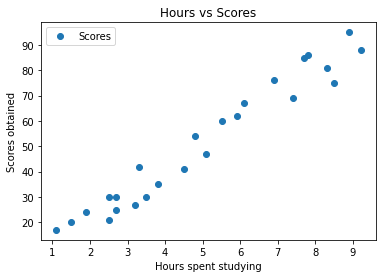

In [3]:
df.plot(x='Hours', y="Scores", style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours spent studying')
plt.ylabel('Scores obtained')
plt.show()

Observing the above plotted graph, we can be sure that they have a linear relation. 

PREPARING THE DATA

In [4]:
X = np.array(df.Hours).reshape(-1,1) 
y = np.array(df.Scores).reshape(-1,1)

As our data is read, lets further split the data for traing and testing. Here we are giving 80% of the data for training.

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)


# IMPORTING ALGORITHMS AND TRAINING

In [6]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

UNDERSTANDING AND VISUALIZING THE ALGORITHM

In [7]:
lin_reg.coef_

array([[9.91065648]])

In [8]:
lin_reg.intercept_

array([2.01816004])

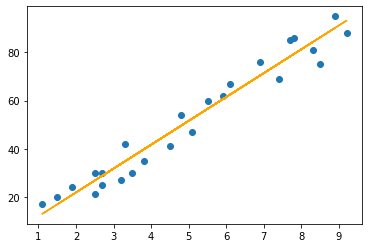

In [9]:
line = lin_reg.intercept_+lin_reg.coef_*X

#plotting line and original output for visual comparision

plt.scatter(X, y)
plt.plot(X, line, color='orange')
plt.show()

Lets use our trained algorithm to compare values

In [10]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [11]:
pred_y = lin_reg.predict(X_test)
pred_y

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [16]:
comparission = pd.DataFrame(y_test,columns=['Orginal'])
comparission['Predicted'] = pred_y
comparission 

,Orginal,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


WHAT WILL BE PREDICTED SCORE BE IF A STUDENT STUDIES FOR 9.25 HOURS?DAY?

In [13]:
hours = 9.25
pred_score = lin_reg.predict(np.array(hours).reshape(-1,1))
print("predicted score for 9.25 hours is", pred_score[0])

predicted score for 9.25 hours is [93.69173249]


DERIVING CONCLUSUION ON THE ALGORITHM

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y)) 

Mean Absolute Error: 4.183859899002975


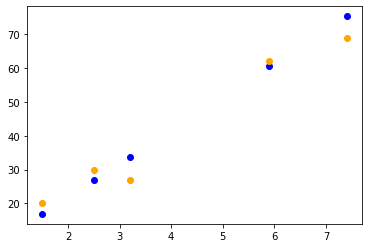

ORANGE - y_test
BLUE - pred_y


In [15]:
plt.scatter (X_test, pred_y, color='blue')
plt.scatter(X_test, y_test, color="orange")
plt.show()
print("ORANGE - y_test")
print("BLUE - pred_y")